### Atividade 1


#### Treinamento

In [44]:
from sklearn.svm import LinearSVC

In [45]:
porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

# 1 => porco, 0 => cachorro
x_train = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
y_train = [1,1,1,0,0,0]

In [46]:
model = LinearSVC()
model.fit(x_train,y_train)

c:\Users\kayqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

#### Previsão

In [47]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([0])

#### Acurácia

In [48]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

testes_x = [misterio1, misterio2, misterio3]
previsoes = model.predict(testes_x)

testes_y = [0, 1, 1]

In [49]:
corretos = (previsoes == testes_y).sum()
total = len(testes_y)
taxa_de_acerto = corretos/total *100

print("Taxa de acerto %.2f %%" % taxa_de_acerto)

Taxa de acerto 66.67 %


Métricas de acurácia com sklearn

In [50]:
from sklearn.metrics import accuracy_score
taxa_de_acerto = accuracy_score(testes_y,previsoes)*100
print("%.2f acurácia" % (taxa_de_acerto))


66.67 acurácia


### Atividade 2

#### Importação dos dados

In [51]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)

In [52]:
dados.head(10)

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
5,1,0,1,1
6,1,1,0,0
7,1,0,1,1
8,1,1,0,0
9,1,0,1,1


#### Separação de dados

In [53]:
x = dados[["home","how_it_works","contact"]] # input
y = dados["bought"] # alvo f(x) = y

SEED = 20 # aparentemente serve para geracao pseudorandomicas da base

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=SEED,test_size=0.33)

In [54]:
model = LinearSVC()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy_rate = accuracy_score(y_test,y_pred)*100
print("%.2f%% " % accuracy_rate)

96.97% 


c:\Users\kayqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [55]:
print("test ",y_test.value_counts(),"treino ", y_train.value_counts())

test  bought
0    25
1     8
Name: count, dtype: int64 treino  bought
0    41
1    25
Name: count, dtype: int64


Proporcionalidade nos valores de treino e teste. Uma massa como desproporção de treino e teste pode enviesar o modelo, afetando sua acurácia. Para isso, há o parâmetro stratify = y que divide as bases de forma proporcional.

In [56]:
SEED = 20 # aparentemente serve para geracao pseudorandomicas da base

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=SEED,stratify=y,test_size=0.33)
model = LinearSVC()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy_rate = accuracy_score(y_test,y_pred)*100
print("%.2f%% " % accuracy_rate)

96.97% 


c:\Users\kayqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [57]:
print("test ",y_test.value_counts(),"treino ", y_train.value_counts())

test  bought
0    22
1    11
Name: count, dtype: int64 treino  bought
0    44
1    22
Name: count, dtype: int64


### Atividade 3

In [58]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)

In [59]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)

#### Preprocessing

In [60]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))


Treinaremos com 1617 elementos e testaremos com 540 elementos


#### Treinamento SVC 

In [62]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 51.48%


c:\Users\kayqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\kayqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Baseline - Linha de comparação com a previsão mais genérica: Chutando tudo 0, ou tudo 1. Essa baseline representa uma marca de qualidade, e precisa ao menos estar acima dela para ser considerado algo satisfatório.

In [63]:
import numpy as np
baseline = np.ones(540)
acuracia = accuracy_score(teste_y, baseline) * 100
print("A baseline é %.2f%%" % acuracia)

A baseline é 52.59%


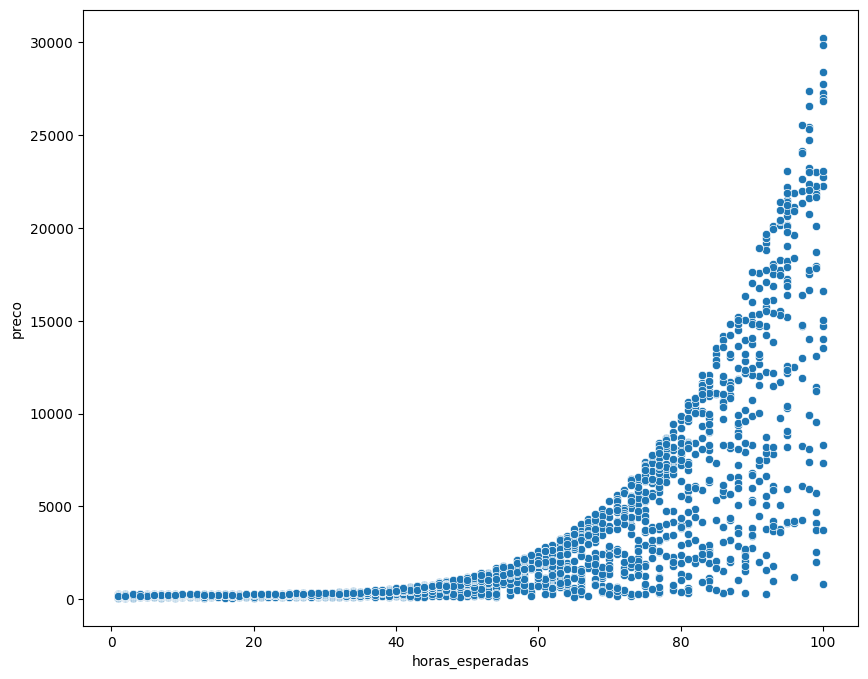

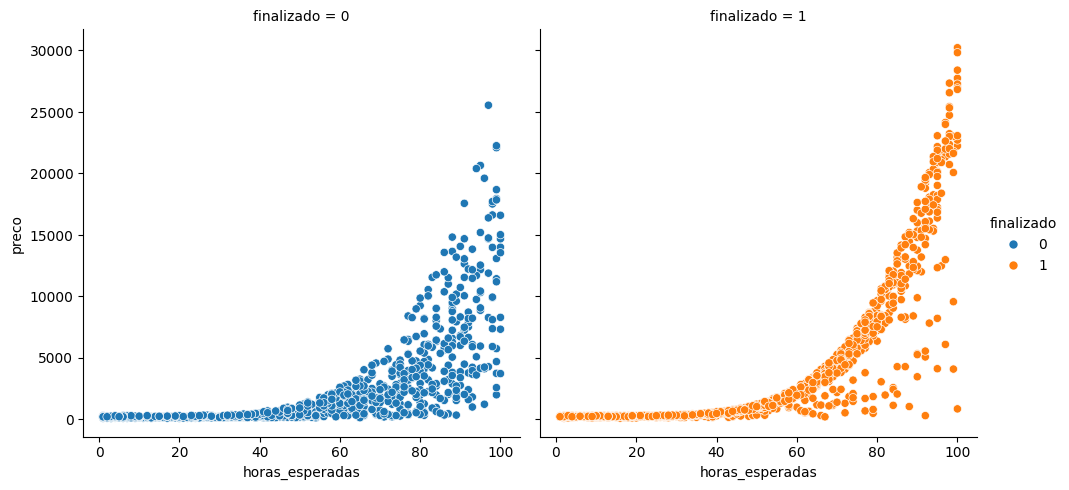

In [64]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)


<Axes: xlabel='horas_esperadas', ylabel='preco'>

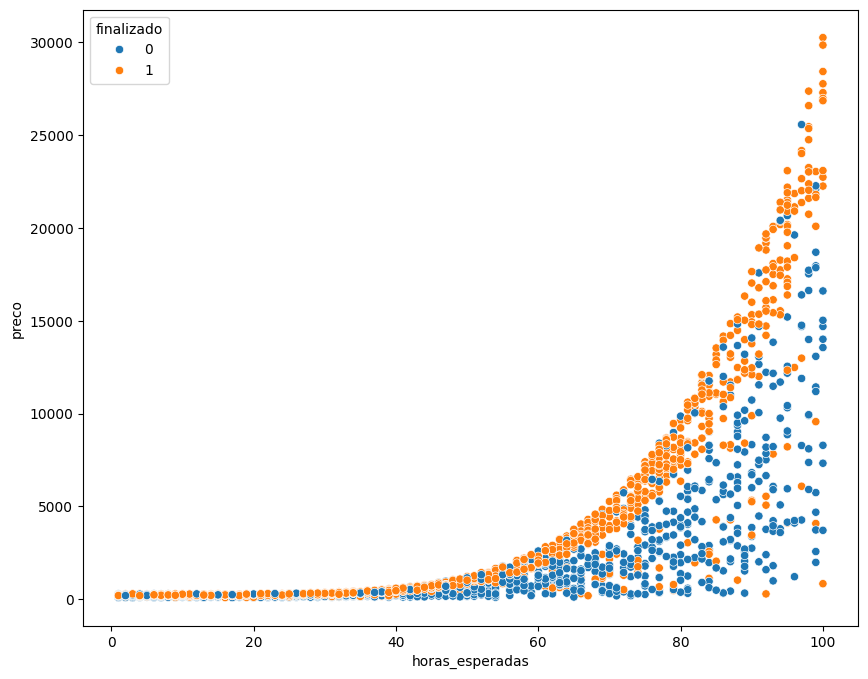

In [65]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

#### DECISION BOUNDARY

In [66]:
x_max = teste_x.horas_esperadas.max()
x_min = teste_x.horas_esperadas.min()

y_max = teste_x.preco.max()
y_min = teste_x.preco.min()


In [67]:
import numpy as np
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [68]:
xx, yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [69]:
Z = modelo.predict(pontos)
Z = Z.reshape((pixels,pixels))
Z

c:\Users\kayqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

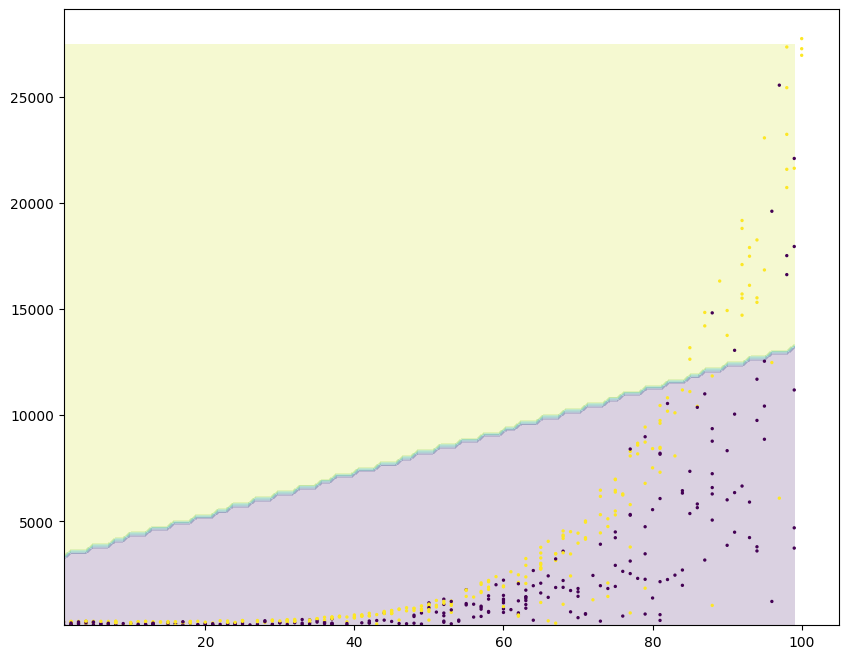

In [70]:
import matplotlib.pyplot as plt
plt.contourf(xx,yy,Z, alpha = 0.2)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c = teste_y, s= 2,)

#### CONSTRUIR UMA FUNCAO DE PLOT DO DECISION BOUNDARY

In [71]:
import matplotlib.pyplot as plt
def plot_decision_boundary(pred_func):
# Set min and max values and give it some padding
    x_max = teste_x.horas_esperadas.max()
    x_min = teste_x.horas_esperadas.min()

    y_max = teste_x.preco.max()
    y_min = teste_x.preco.min()
    
    # h = (x_max-x_min)/pixels

    pixels = 100
    eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
    eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

    xx, yy = np.meshgrid(eixo_x,eixo_y)
    pontos = np.c_[xx.ravel(),yy.ravel()]

    Z = pred_func(pontos)
    Z = Z.reshape((pixels,pixels))  

    plt.contourf(xx,yy,Z, alpha = 0.2, cmap=plt.cm.Spectral)
    plt.scatter(teste_x.horas_esperadas, teste_x.preco, c = teste_y, s= 2,)

In [72]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(treino_x)
teste_x = scaler.transform(teste_x)

import matplotlib.pyplot as plt
def plot_decision_boundary_std(pred_func):
# Set min and max values and give it some padding
    x_max = teste_x[:,0].max()
    x_min = teste_x[:,0].min()

    y_max = teste_x[:,1].max()
    y_min = teste_x[:,1].min()
    
    # h = (x_max-x_min)/pixels

    pixels = 100
    eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
    eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

    xx, yy = np.meshgrid(eixo_x,eixo_y)
    pontos = np.c_[xx.ravel(),yy.ravel()]

    Z = pred_func(pontos)
    Z = Z.reshape(xx.shape)  

    plt.contourf(xx,yy,Z, alpha = 0.2, cmap=plt.cm.Spectral)
    plt.scatter(teste_x[:,0], teste_x[:,1], c = teste_y, s= 2,)

### Challange: Encontrar modelos que se adequem a curva em questão.

import de modelos

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

#### RANDON FOREST

A acurácia foi 79.074074%


Text(0.5, 1.0, 'Random Forest')

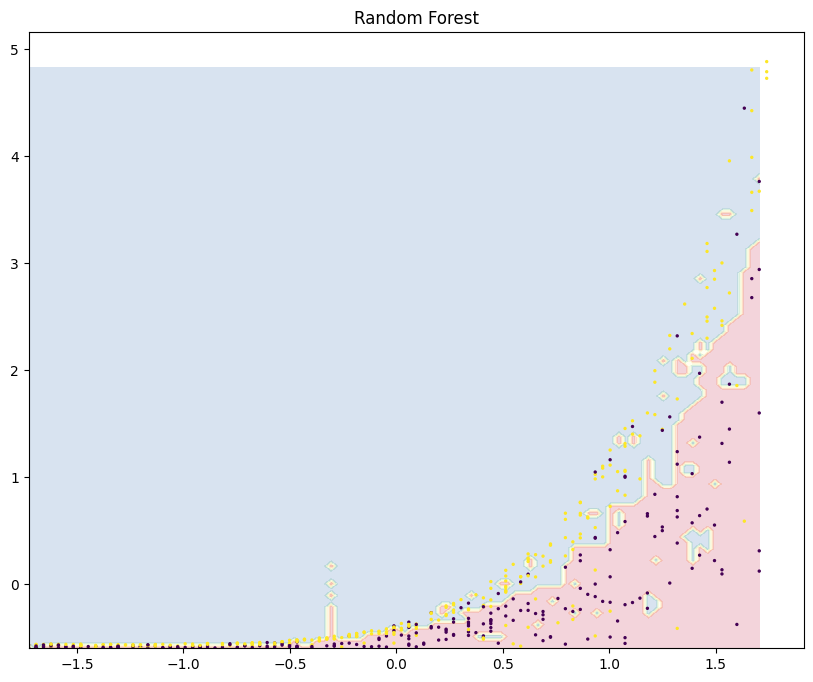

In [74]:
clf1 = RandomForestClassifier(random_state=1, n_estimators=100)
# clf1.fit(x, y)

clf1.fit(treino_x, treino_y)

previsoes = clf1.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

print("A acurácia foi %.6f%%" % acuracia)

#boundary decision
plot_decision_boundary_std(lambda x: clf1.predict(x))
plt.title("Random Forest")

#### LOGISTIC REGRESSION

A acurácia foi 58.148148%


Text(0.5, 1.0, 'Logistic Regression')

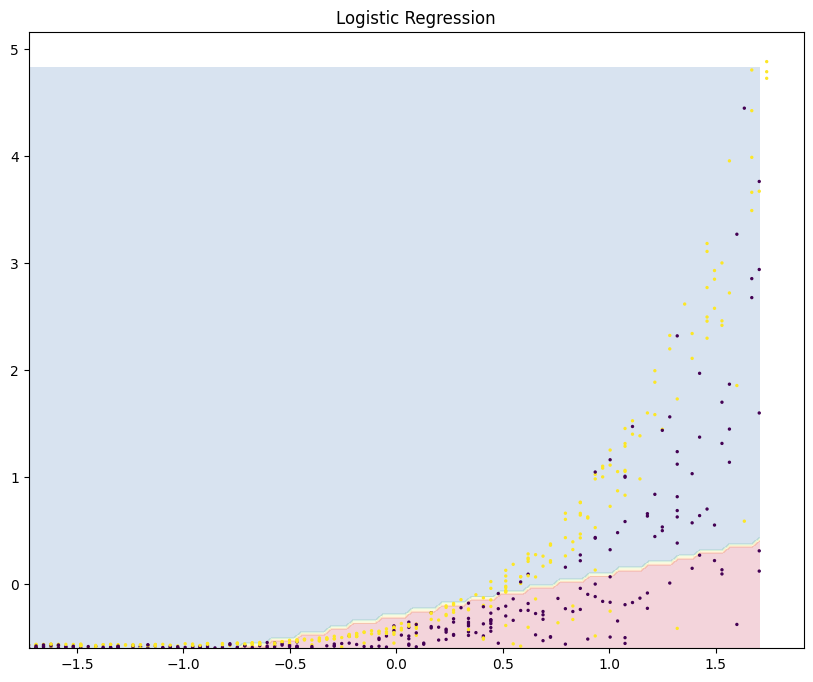

In [75]:
import sklearn
from sklearn.linear_model import LogisticRegression
# Train the logistic rgeression classifier

clf = sklearn.linear_model.LogisticRegressionCV()

clf.fit(treino_x, treino_y)

previsoes = clf.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

print("A acurácia foi %.6f%%" % acuracia)
# Plot the decision boundary
plot_decision_boundary_std(lambda x: clf.predict(x))
plt.title("Logistic Regression")

#### SUPPORT VECTOR MACHINE

A acurácia foi 70.37%


Text(0.5, 1.0, 'Support Vector Machine')

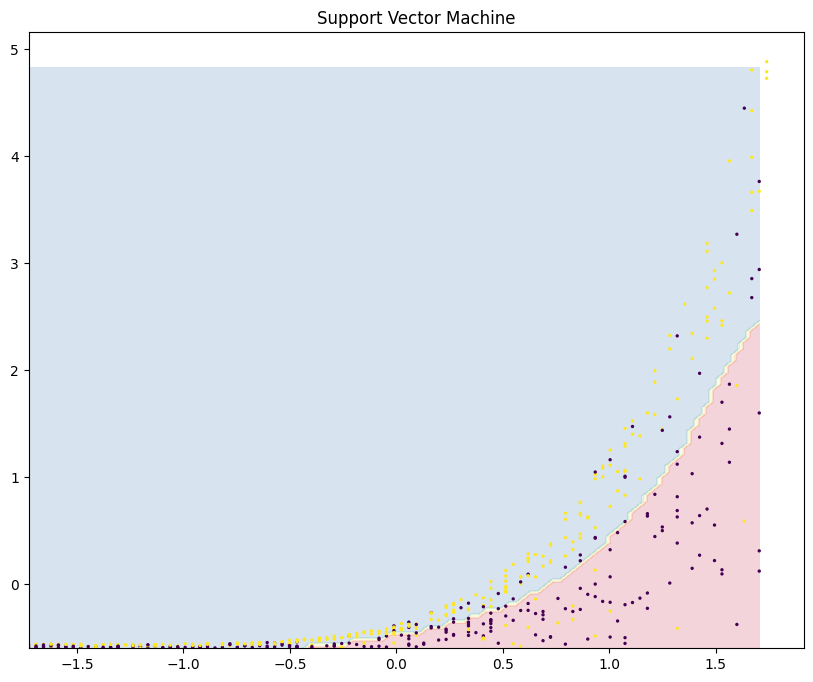

In [76]:
from sklearn.svm import SVC
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
# Train the Support Vector Machine classifier
clf3 = SVC(gamma='auto')

clf3.fit(treino_x, treino_y)

#Accuracy
previsoes = clf3.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100


plot_decision_boundary_std(lambda c: clf3.predict(c))
print("A acurácia foi %.2f%%" % acuracia)
plt.title("Support Vector Machine")

#### DECISION TREE

A acurácia foi 74.44%


Text(0.5, 1.0, 'Decision Tree')

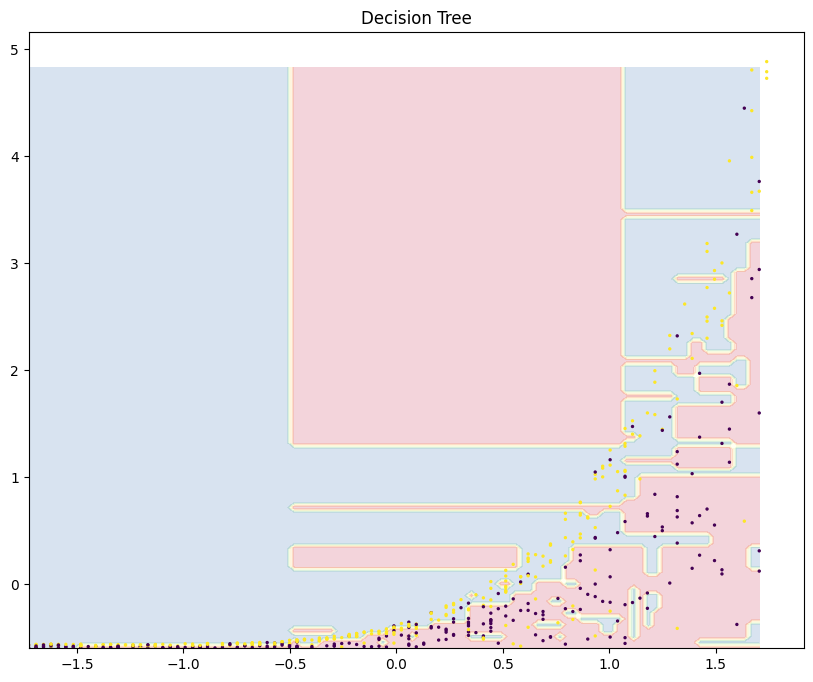

In [77]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# Train the Decision Tree classifier
clf4 = DecisionTreeClassifier()
clf4.fit(treino_x, treino_y)


previsoes = clf4.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

# Plot the decision boundary
plot_decision_boundary_std(lambda x: clf4.predict(x))
print("A acurácia foi %.2f%%" % acuracia)
plt.title("Decision Tree")

#### GAUSSIAN-NB CLASSIFIER

A acurácia foi 52.22%


Text(0.5, 1.0, 'GaussianNB Classifier')

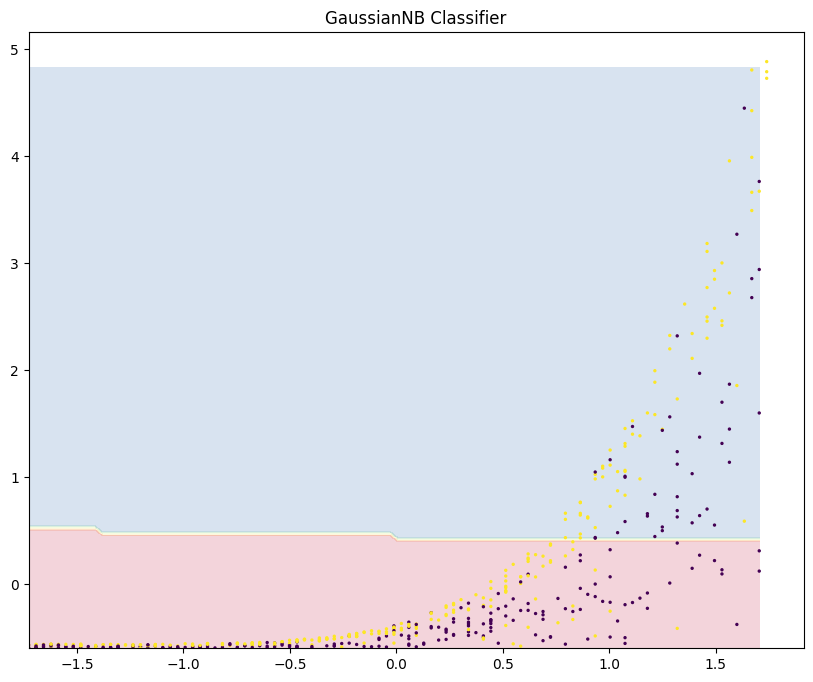

In [78]:
from sklearn.naive_bayes import GaussianNB
# Train the Gaussian NaiveBayes classifier
clf5 = GaussianNB()
clf5.fit(treino_x, treino_y)


previsoes = clf5.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

# Plot the decision boundary
plot_decision_boundary_std(lambda x: clf5.predict(x))
print("A acurácia foi %.2f%%" % acuracia)
plt.title("GaussianNB Classifier")


### ARRUMANDO ESCALA

In [79]:
from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC(gamma='auto')

Treinaremos com 1617 elementos e testaremos com 540 elementos


Z-Score Normalization (Standardisation)

Treinamento do modelo

In [81]:
modelo.fit(treino_x, treino_y)
plot_decision_boundary_std(lambda x: modelo.predict(x))

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [ ]:
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 67.41%


### Atividade 4

##### Import e preprocessing

In [ ]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

In [ ]:
from datetime import datetime
dados.drop(columns="Unnamed: 0", axis=0, inplace=True)

current_year = datetime.now().year
dados.model_year = dados.apply(lambda raw: current_year - raw.model_year 
             , axis=1)
    
sold = {"yes":1, 'no':0}
dados.sold = dados.sold.map(sold)

dados["total_mileage"] = dados.apply(lambda row: row.mileage_per_year*row.model_year,axis=1)
dados["vendido"] = dados.sold
dados.drop(columns=["mileage_per_year", "sold"], axis=0, inplace=True)

##### SPLIT da base e treinamento

In [ ]:
x = dados[["total_mileage",'model_year','price']]
y = dados.vendido

In [ ]:
from sklearn.model_selection import train_test_split

import numpy as np

SEED = 20
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


Treinaremos com 1617 elementos e testaremos com 540 elementos


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print('Modelo SVC \nacuracia: %.2f%%' % acuracia)

Modelo SVC 
acuracia: 76.16%


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print('Modelo Linear SVC \nacuracia: %.2f%%' % acuracia)

Modelo Linear SVC 
acuracia: 69.76%


c:\Users\kayqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


##### Baseline
 - Usando o Dummy para gerar previsões triviais.
 - O parâmetro strategy é o método de split dos dados no treino do dummy. Ou seja, comparar as etratégias e escolher o maior base line como referência. 

In [ ]:
from sklearn.dummy import DummyClassifier

np.random.seed(SEED)
dummy_stratfied = DummyClassifier(strategy="stratified")

dummy_stratfied.fit(X_train, y_train)
previsoes_dummy = dummy_stratfied.predict(X_test)
acuracia_dummy = accuracy_score(y_test, previsoes_dummy)*100
print('acuracia_dummy: %.2f%%' % acuracia_dummy)

acuracia_dummy: 49.84%


In [ ]:
from sklearn.dummy import DummyClassifier
np.random.seed(SEED)
dummy_stratfied = DummyClassifier(strategy="most_frequent")

dummy_stratfied.fit(X_train, y_train)
previsoes_dummy = dummy_stratfied.predict(X_test)
acuracia_dummy = accuracy_score(y_test, previsoes_dummy)*100
print('acuracia_dummy: %.2f%%' % acuracia_dummy)

acuracia_dummy: 57.52%


#### Decision Tree

In [ ]:
import matplotlib.pyplot as plt
def plot_decision_boundary_std(pred_func):
# Set min and max values and give it some padding
    x_max = teste_x[:,0].max()
    x_min = teste_x[:,0].min()

    y_max = teste_x[:,1].max()
    y_min = teste_x[:,1].min()
    
    # h = (x_max-x_min)/pixels

    pixels = 100
    eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
    eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

    xx, yy = np.meshgrid(eixo_x,eixo_y)
    pontos = np.c_[xx.ravel(),yy.ravel()]

    Z = pred_func(pontos)
    Z = Z.reshape(xx.shape)  

    plt.contourf(xx,yy,Z, alpha = 0.2, cmap=plt.cm.Spectral)
    plt.scatter(teste_x[:,0], teste_x[:,1], c = teste_y, s= 2,)

A acurácia foi 72.41%


Text(0.5, 1.0, 'Decision Tree')

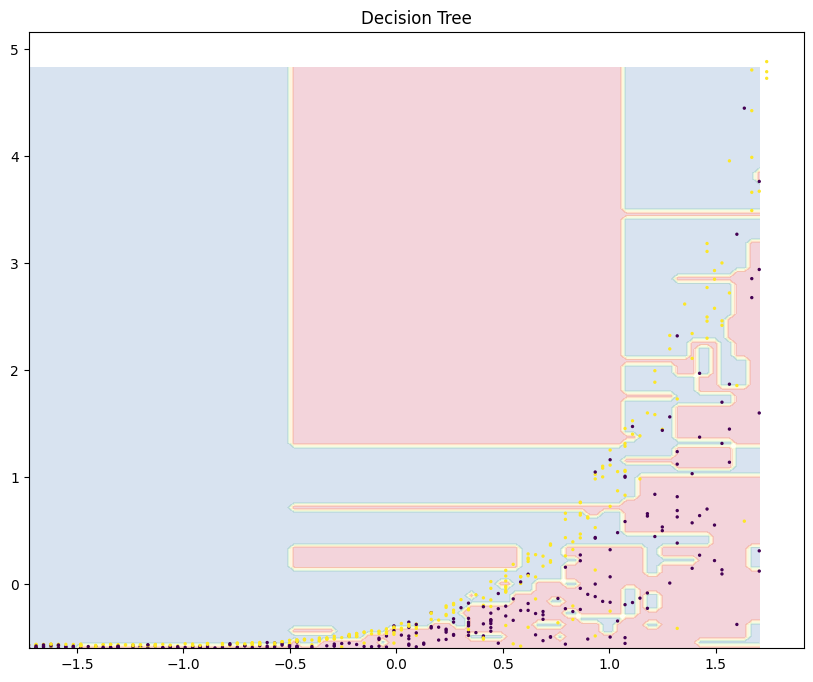

In [ ]:
from sklearn.tree import DecisionTreeClassifier
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# Train the Decision Tree classifier
clf4 = DecisionTreeClassifier()
clf4.fit(treino_x, treino_y)


previsoes = clf4.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

# Plot the decision boundary
plot_decision_boundary_std(lambda x: clf4.predict(x))
print("A acurácia foi %.2f%%" % acuracia)
plt.title("Decision Tree")